<a href="https://colab.research.google.com/github/Hubobv/AI_Final_Project/blob/main/Tomato_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
import numpy as np
from numpy import save, asarray
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

folder = '/content/drive/MyDrive/Tomato(1)/'

photos, labels = list(), list()

for file in listdir(folder):
    output = None
    if file.startswith('green_tomato'):
        output = 0
    if file.startswith('not_tomato'):
        output = 1
    if file.startswith('purple_tomato'):
        output = 2
    if file.startswith('red_tomato'):
        output = 3
    if file.startswith('yellow_tomato'):
        output = 4
    if output is not None:
        photo = load_img(folder + file, target_size=(200, 200, 3))
        photo = img_to_array(photo)
        photos.append(photo)
        labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

# Save photos and labels to disk
save('/content/drive/MyDrive/Tomato(1)/Tomato(1)_photos.npy', photos)
save('/content/drive/MyDrive/Tomato(1)/Tomato(1)_labels.npy', labels)

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(200, 200, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
from keras.losses import categorical_crossentropy
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])
classes = ['green_tomato','not_tomato', 'purple_tomato', 'red_tomato', 'yellow_tomato']

# Train the model
train = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=64, verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(953, 200, 200, 3) (953,)
(667, 200, 200, 3)
(667,)
(286, 200, 200, 3)
(286,)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/64
6/6 [==============================] - 27s 1s/step - loss: 2.1758 - accuracy: 0.2354 - val_loss: 2.0917 - val_accuracy: 0.2273
Epoch 2/64
6/6 [==============================] - 3s 497ms/step - loss: 1.8311 - accuracy: 0.2564 - val_loss: 1.8445 - val_accuracy: 0.2273
Epoch 3/64
6/6 [==============================] - 3s 502ms/step - loss: 1.7531 - accuracy: 0.2774 - val_loss: 1.7622 - val_accuracy: 0.3671
Epoch 4/64
6/6 [==============================] - 3s 500ms/step - loss: 1.7248 - accuracy: 0.2759 - val_loss: 1.7868 - val_accuracy: 0.2273
Epoch 5/64
6/6 [==============================] - 3s 524ms/step - loss: 1.7315 - accuracy: 0.2759 - val_loss: 1.8010 - val_accuracy: 0.2273
Epoch 6/64
6/6 [==============================] - 3s 506ms/step - loss: 1.6432 - accuracy: 0.3403 - val_loss: 1.7778 - val_accuracy: 0.3357
Epoch 7/64
6/6 [==============================] - 3s 510ms/step - loss: 1.6535 - accuracy: 0.3268 - val_loss: 1.7446 - val_accuracy: 0.3112
Epoch 8/64
6/6 [======

In [ ]:
from keras.models import load_model
model.save('model_tomato2.h5')

1/1 [==============================] - 1s 810ms/step


'red_tomato'

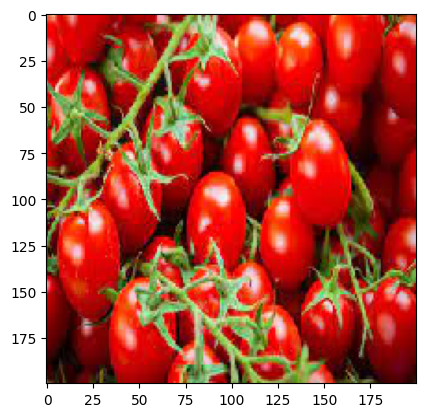

In [ ]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
model=load_model('model_tomato2.h5')
img=load_img('/download (3).jpg', target_size=(200,200)) 
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
img = img.astype('float32')
img /= 255
y_pred = model.predict(img)
y_classes = [np.argmax(i) for i in y_pred]
classes[y_classes[0]]

1/1 [==============================] - 0s 167ms/step


'yellow_tomato'

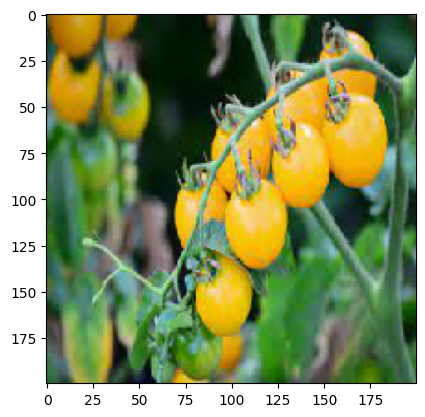

In [ ]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
model=load_model('model_tomato2.h5')
img=load_img('/download (2).jpg', target_size=(200,200)) 
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
img = img.astype('float32')
img /= 255
y_pred = model.predict(img)
y_classes = [np.argmax(i) for i in y_pred]
classes[y_classes[0]]

1/1 [==============================] - 0s 168ms/step


'green_tomato'

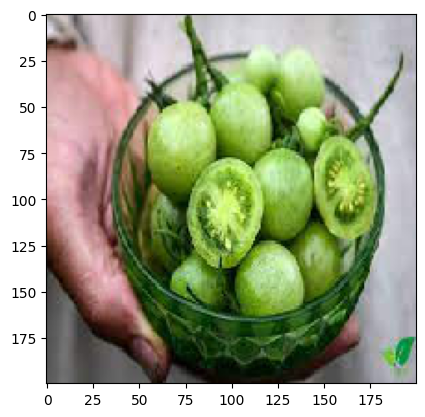

In [ ]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
model=load_model('model_tomato2.h5')
img=load_img('/download (5).jpg', target_size=(200,200)) 
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
img = img.astype('float32')
img /= 255
y_pred = model.predict(img)
y_classes = [np.argmax(i) for i in y_pred]
classes[y_classes[0]]

1/1 [==============================] - 0s 162ms/step


'purple_tomato'

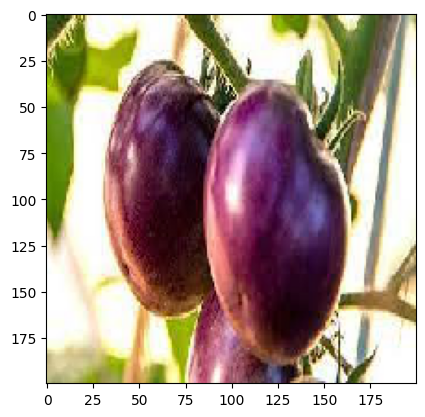

In [ ]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
model=load_model('model_tomato2.h5')
img=load_img('/download (6).jpg', target_size=(200,200)) 
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
img = img.astype('float32')
img /= 255
y_pred = model.predict(img)
y_classes = [np.argmax(i) for i in y_pred]
classes[y_classes[0]]